**College Info ChatBot - College.Pal 📚**

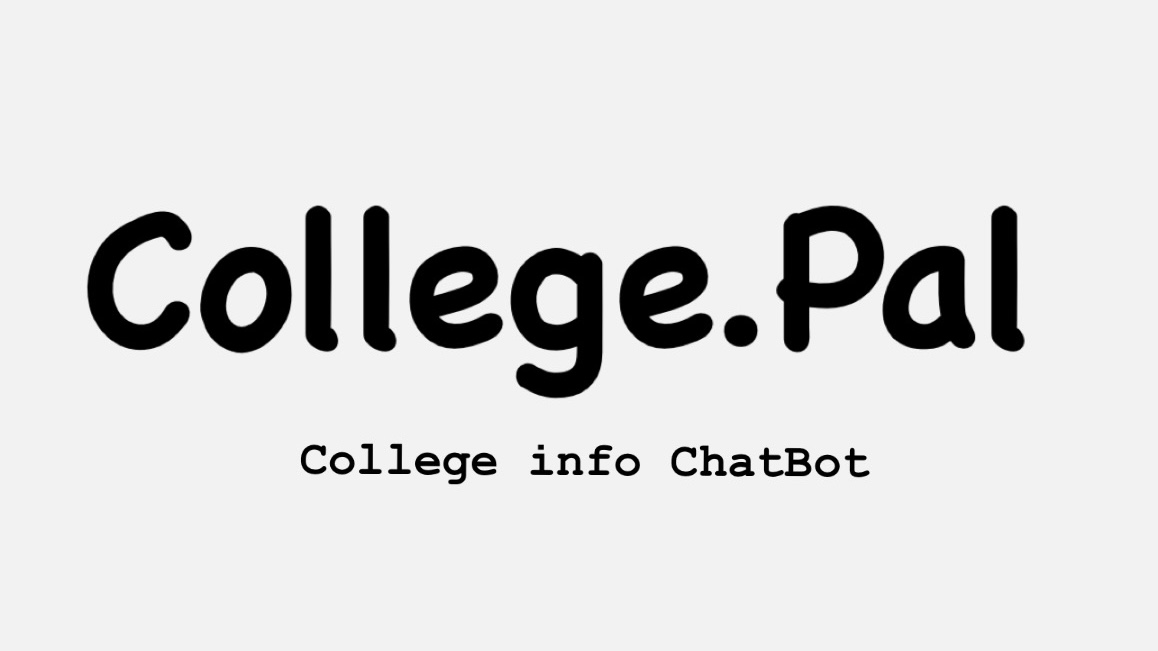

In [ ]:
!pip install langchain
!pip install langchain-community
!pip install huggingface_hub
!pip install sentence_transformers
!pip install unstructured
!pip install chromadb
!pip install Cython
!pip install tiktoken
!pip install unstructured[local-inference]

In [ ]:
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "Your HF Token Here"

from langchain.document_loaders import UnstructuredPDFLoader
from langchain.indexes import VectorstoreIndexCreator
from langchain.llms import HuggingFaceHub
# Embeddings
from langchain.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()
# Text Splitter
from langchain.text_splitter import CharacterTextSplitter

pdf_files = ['/content/project dataset.pdf']
loaders = [UnstructuredPDFLoader(pdf_file) for pdf_file in pdf_files]

# Print the list of loaders
print(loaders)

index = VectorstoreIndexCreator(
    embedding=HuggingFaceEmbeddings(),
    text_splitter=CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)).from_loaders(loaders)

llm=HuggingFaceHub(repo_id="google/flan-t5-large", model_kwargs={"temperature":1, "max_length":512})
from langchain.chains import RetrievalQA
chain = RetrievalQA.from_chain_type(llm=llm,
                                    chain_type="stuff",
                                    retriever=index.vectorstore.as_retriever(),
                                    input_key="question")

In [ ]:
chain.run('What programs VIPS Delhi offers?')

'BTech, BBA, BCA, BJMC, BA, BCom, and BA LLB'

In [ ]:
chain.run('How can I take admission into Btech')

'JEE Main scores are also accepted by the Vivekananda Institute of Professional Studies for B.Tech admission'

In [ ]:
chain.run('Where is VIPS located')

'Delhi'

In [ ]:
chain.run('Under whose affiliation VIPS comes')

'Guru Gobind Singh Indraprastha University'